In [1]:
# import Library
import pandas as pd
import nltk

In [2]:
# Reading Dataset
data = pd.read_csv('dataset/Transcript.csv')

In [3]:
# data = data[['rating','date','verified_reviews']]
data.sample(10)

,Sno,Text,Sentiment
20,21,"Call pizza offices. Chloe may have your name, ...",1
12,13,"Hi, welcome to Pizza Hut this is median. Can I...",1
4,5,"Hi, welcome to Pizza Hut. My name is Christine...",1
55,56,Welcome to Pizza Hut. My name is Miguel. Can I...,0
13,14,Pizza Hut this is she gonna get your name?My n...,0
18,19,"Hi, welcome to Pizza Hut this is Chris may hav...",1
60,61,"Thank you for calling pizza. This is June, may...",1
16,17,"For calling Pizza Hut. This is well, can I hav...",1
24,25,"Thank you for calling Pizza Hut. This is well,...",0
10,11,Thank you for calling Pizza Hut. My name is Ma...,1


In [4]:
# data['date'] = pd.to_datetime(data['date']) #convert date,string to number

# # Concating ,"rating" "date" "variation" in  in new column name "reviews"
# data['reviews'] = data['date'].astype(str) + ' ' + data['rating'].astype(str) + ' ' + data['variation'] + ' ' + data['verified_reviews']
# data.sample(10)

In [5]:
data['Text'][20]

"Call pizza offices. Chloe may have your name, please.Hi, my name is ***. Can you please connect my call to the crumbles above the 3977 at Pizza Hut.In order for delivery or pick up pick up pick up. I just wanna be OK. Well I can take the orders for you. Which store would that be?R cran burn a Cameron Bank.893977 OK. One moment. Yeah OK I can take the order for wait time. It's going to be 15 minutes the orders to be ready. What's your order please?2 two pieces for 15. Today right to last Tuesday. Yeah, what would you like to get?I wonder one vegetarian option.Veggie.No I want.Um holding spicy chicken.Cross.I wanna deep pan.OK and then.Uh, in the vegetarian you can you suggest me which in vegetable pizza is good.Like a full of vegetables and which one is good?Station.Father Veggie sensation.Yes.Target has.So on Thigpen as well.An example.That's it, how would the chicken Supreme is good?Chicken Supreme hang in there for a moment. Yes. Chicken Supreme is also combination of veggie and chi

In [6]:
# data['date'] = pd.to_datetime(data['date']) #convert date string to number

In [7]:
# Showing file information

# Column Name      ->       Discription
# ------------------------------------------------------------------------
# Rating           ->       satisfaction value of range [1,5]
# date             ->       date of item purchased
# variation        ->       When we shop online, the same product is available in various sizes, colors,materials
#                           and price points. These purchasing options are product variants.
# verified_reviews ->       Feedback by customers 
# feedback         ->       value of verified_reviews positive(1) or negative(0)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sno        65 non-null     int64 
 1   Text       65 non-null     object
 2   Sentiment  65 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.6+ KB


In [8]:
# ========== Performing Cleaning operations on Data ==============

# importing Libraries

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import string
lemmatizer = WordNetLemmatizer()
punct = string.punctuation
stopwords = set(stopwords.words('english'))


def text_clean(text):
    text = text.lower()  #Convert text in lower case
    punc_removed = [char for char in text if char not in punct]  #Removing Punctuations
    punc_removed_join = ''.join(punc_removed)
    
    #Lemmatizing and removing Stop words
    punc_removed_clean = [lemmatizer.lemmatize(word) for word in punc_removed_join.split() if word not in stopwords]
    
    #Removing word those length is 1 or 2
    punc_removed_clean = [word for word in punc_removed_clean if len(word) > 2] 
    punc_removed_clean_join = ' '.join(punc_removed_clean)
    
    return punc_removed_clean_join

In [9]:
data['clean_reviews'] = data['Text'].apply(text_clean)  #Calling data clean function
data.sample(20)

,Sno,Text,Sentiment,clean_reviews
51,52,How you thank you for calling Pizza Hut is Dra...,1,thank calling pizza hut drake name pleasealrig...
38,39,"Hi, welcome to Pizza Hut Irene speaking. Can I...",1,welcome pizza hut irene speaking take name ple...
61,62,Thank you for calling Pizza Hut this is Shane....,1,thank calling pizza hut shane get namemy name ...
60,61,"Thank you for calling pizza. This is June, may...",1,thank calling pizza june may name pleaseyeah n...
50,51,"Hello, thank you for calling Pizza Hut this jo...",1,hello thank calling pizza hut joy name pleasea...
20,21,"Call pizza offices. Chloe may have your name, ...",1,call pizza office chloe may name pleasehi name...
21,22,Welcome to Pizza Hut. My name is Miguel can ha...,0,welcome pizza hut name miguel name please orde...
4,5,"Hi, welcome to Pizza Hut. My name is Christine...",1,welcome pizza hut name christine may name plea...
23,24,Thank you for calling Pizza Hut this is Belle ...,0,thank calling pizza hut belle name please andh...
14,15,"Hi, welcome to Pizza Hut. My name is Christine...",1,welcome pizza hut name christine may name plea...


In [10]:
data.describe(include="all")

,Sno,Text,Sentiment,clean_reviews
count,65.00000,65,65.00000,65
unique,NaN,60,NaN,60
top,NaN,"Hi, welcome to Pizza Hut. My name is Christine...",NaN,welcome pizza hut irene speaking take name ple...
freq,NaN,2,NaN,2
mean,33.00000,NaN,0.60000,NaN
std,18.90767,NaN,0.49371,NaN
min,1.00000,NaN,0.00000,NaN
25%,17.00000,NaN,0.00000,NaN
50%,33.00000,NaN,1.00000,NaN
75%,49.00000,NaN,1.00000,NaN


In [11]:
data.isnull().sum()

Sno              0
Text             0
Sentiment        0
clean_reviews    0
dtype: int64

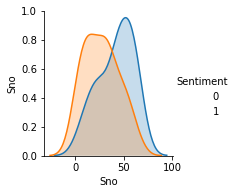

In [12]:
# # ----------- Representing data ---------------------

import seaborn as sns
sns.pairplot(data,hue='Sentiment')

In [13]:
# Representing highest perchase on date
date = data['Sentiment'].value_counts()
date.head()

1    39
0    26
Name: Sentiment, dtype: int64

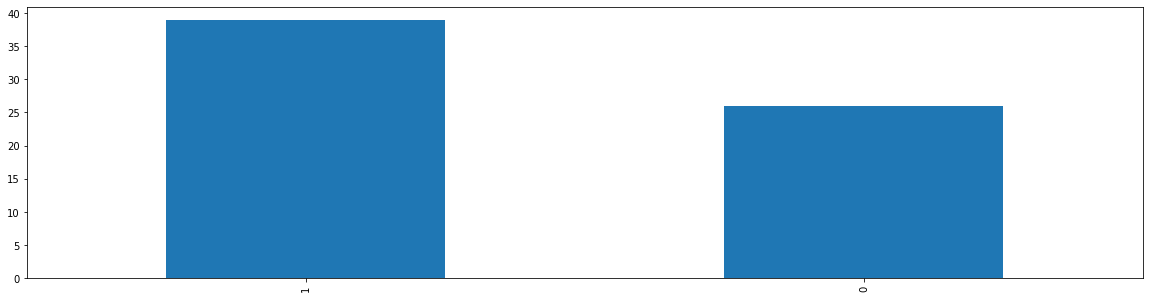

In [14]:
date.plot(kind='bar',figsize=(20,5))

In [15]:
# # Representing high rating
# rating = data['rating'].value_counts()
# rating.head()

In [16]:
# rating.plot(kind='bar')

In [17]:
# variance = data['variation'].value_counts()
# variance.head()

In [18]:
# variance.plot(kind='bar')

In [19]:
# Getting bag of words on in reviews
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=200)
# X = vectorizer.fit_transform(data['clean_reviews'],data['date']).toarray() #getting array of Bag of Words
X = vectorizer.fit_transform(data['clean_reviews']).toarray() #getting array of Bag of Words
X.shape

(65, 200)

In [20]:
X


array([[0, 0, 1, ..., 2, 0, 0],
       [0, 0, 2, ..., 0, 0, 1],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0]], dtype=int64)

In [21]:
y=pd.get_dummies(data['Sentiment']) #get_dummies --> it used for categorical variable into a series of zeros and ones
y=y.iloc[:,1].values #getting value of second column

In [22]:
# y = data['feedback']

In [23]:
y

array([1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
      dtype=uint8)

In [24]:
from sklearn.model_selection import train_test_split      #deviding data into training and test data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# X_train -> Taking dataset for training 
# X_test  -> Taking dataset for testing
# y_train -> output(target data) for training
# y_test  -> output(target data) for testing
# test_size -> The ideal split is said to be 80:20 for training and testing.
#              for our need we adjust it depending on the size of the dataset and parameter complexity.

# random_state -> random state value present the state of suffle data in train and test split

In [25]:
print(X_train)
X_train.shape

[[0 0 0 ... 1 0 0]
 [0 1 0 ... 3 1 0]
 [0 2 0 ... 0 0 4]
 ...
 [0 0 1 ... 2 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


(48, 200)

In [26]:
print(X_test)
X_test.shape

[[0 0 0 ... 0 0 1]
 [4 0 1 ... 1 0 4]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 1 ... 2 0 0]
 [0 0 0 ... 0 0 0]]


(17, 200)

In [27]:
print(y_train)
y_train.shape

[1 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 0 1 1 1 1 0 1 0 1 1
 0 1 1 0 1 0 1 1 0 1 0]


(48,)

In [28]:
print(y_test)
y_test.shape

[0 1 0 0 1 1 1 0 1 0 0 1 1 1 0 1 1]


(17,)

# # --------- Model Selection -----------

In [29]:
# Importing library
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

---------------- Using model Logistic regression ------------------

In [30]:
#Using model Logistic regression
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
logistic.fit(X_train, y_train)    #fitting training data in model
pred_logistic = logistic.predict(X_test)  #getting predict value on test data

score = logistic.score(X_test, y_test) #getting accuracy on predict and real data
cm = confusion_matrix(y_test, pred_logistic)  #generating confussion metrics
cr1 = classification_report(y_test, pred_logistic)  #generating classification report

print("Logistic Regression Accuracy :   %0.2f" % score)
print("Confussion Metrics : ","\n",cm)
print("Classification Report : ","\n",cr1)

Logistic Regression Accuracy :   0.65
Confussion Metrics :  
 [[5 2]
 [4 6]]
Classification Report :  
               precision    recall  f1-score   support

           0       0.56      0.71      0.63         7
           1       0.75      0.60      0.67        10

    accuracy                           0.65        17
   macro avg       0.65      0.66      0.65        17
weighted avg       0.67      0.65      0.65        17



---------------- MultinomialNB Classifier ----------------


In [31]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()  
classifier.fit(X_train, y_train)  #fitting training data in model

pred_m = classifier.predict(X_test)  #getting predict value on test data
score = metrics.accuracy_score(y_test, pred_m)  #getting accuracy on predict and real data
cm = metrics.confusion_matrix(y_test, pred_m)   #generating confussion metrics
cr2 = classification_report(y_test, pred_m)  #generating classification report

print("MultinomialNB Classifier Accuracy :   %0.2f" % score)
print("Confussion Metrics : ","\n",cm)
print("Classification Report : ","\n",cr2)

MultinomialNB Classifier Accuracy :   0.47
Confussion Metrics :  
 [[3 4]
 [5 5]]
Classification Report :  
               precision    recall  f1-score   support

           0       0.38      0.43      0.40         7
           1       0.56      0.50      0.53        10

    accuracy                           0.47        17
   macro avg       0.47      0.46      0.46        17
weighted avg       0.48      0.47      0.47        17



------------- KNeighbors Classifier ---------------

In [32]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)  #fitting training data in model

pred_knn = knn.predict(X_test)  #getting predict value on test data
score = metrics.accuracy_score(y_test, pred_knn) #getting accuracy on predict and real data
cm = metrics.confusion_matrix(y_test, pred_knn)
cr3 = classification_report(y_test, pred_knn)

print("KNN Classifier Accuracy :   %0.2f" % score)
print("Confussion Metrics : ","\n",cm)
print("Classification Report : ","\n",cr3)

KNN Classifier Accuracy :   0.35
Confussion Metrics :  
 [[1 6]
 [5 5]]
Classification Report :  
               precision    recall  f1-score   support

           0       0.17      0.14      0.15         7
           1       0.45      0.50      0.48        10

    accuracy                           0.35        17
   macro avg       0.31      0.32      0.32        17
weighted avg       0.34      0.35      0.34        17

